### Name:

<pre> Maryam Mohseni </pre>

#### 1) blu Marketing
The small city of blufield has a total number of 8,000 families. Each family lives in a house.
These houses are distributed over a square shaped area of 5000 by 5000 meters by the following distribution: 1) ¼ of the houses are distributed normally (mean in center) in a 2000-by-2000 square in the center. With SD=500 meters. 2) The remaining ¾ are distributed normally (mean in center) all over the city with SD=1250 meters.
Blu, as an online bank, wants to see how much people spend on transportation to a regular bank. Assume the banks are located in the following locations:
A: 2000, 2500
B: 4200, 4000
C: 3500,500
D: 1000,4200
E: 700,500
When going to a bank, people choose the nearest bank available. If it is less than 500 meters away, it would cost 1 unit of money to get there, if it is less than a kilometer away it costs 3 and otherwise it costs 5 units of money to get there. 

In [1]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

(6000, 2)


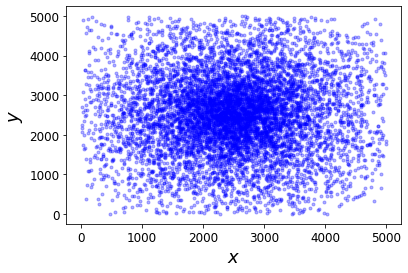

In [2]:
m=8000
data1 = np.random.normal(0, 500, (2000,2))
i=0
List=[]
#For 3/4 houses that are distributed normally around the center with SD=1250, we should
#make sure that they are located within the square of 5000 by 5000!
while i<12000:
    r = np.random.normal(0, 1250)
    if abs(r) <= 2500:
        List.append(r)
        i=i+1
data2=np.array(List)
data2=data2.reshape(6000,2)
print(data2.shape)
data = np.r_[data1, data2] 
data=data+2500
x=data[:,0]
y=data[:,1]
plt.plot(x, y, "b.", alpha=0.3)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.show()

In [3]:
banks=np.array([[2000, 2500],
              [4200, 4000],
              [3500, 500],
               [1000, 4200],
               [700, 500]])
banks[0,:]

array([2000, 2500])

Next, we plot the houses and the banks, and fill the areas with different costs with different colors. For the houses located in red areas, the transportation cost is 1 unit of money. For the houses located in green areas, the transportation cost is 3 units of money and finally the houses in white areas should pay 5 units of monet to go to the bank.

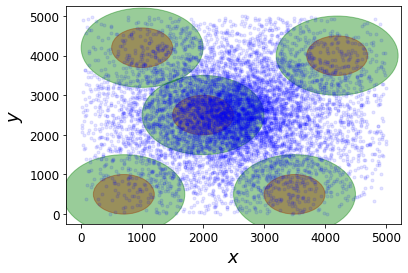

In [4]:
plt.plot(x, y, "b.", alpha=0.1)
circle1 = plt.Circle(banks[0,:], 500, alpha= 0.4, color='r')
circle2 = plt.Circle(banks[1,:], 500, alpha= 0.4, color='r')
circle3 = plt.Circle(banks[2,:], 500, alpha= 0.4, color='r')
circle4 = plt.Circle(banks[3,:], 500, alpha= 0.4, color='r')
circle5 = plt.Circle(banks[4,:], 500, alpha= 0.4, color='r')
circle6 = plt.Circle(banks[0,:], 1000, alpha= 0.4, color='g')
circle7 = plt.Circle(banks[1,:], 1000, alpha= 0.4, color='g')
circle8 = plt.Circle(banks[2,:], 1000, alpha= 0.4, color='g')
circle9 = plt.Circle(banks[3,:], 1000, alpha= 0.4, color='g')
circle10 = plt.Circle(banks[4,:], 1000, alpha= 0.4, color='g')

fig = plt.gcf()
ax = fig.gca()
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)
ax.add_artist(circle5)
ax.add_artist(circle6)
ax.add_artist(circle7)
ax.add_artist(circle8)
ax.add_artist(circle9)
ax.add_artist(circle10)

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.show()

Using this information, answer the following:
1) In which areas of the city should blu focus on advertising about how using blu would decrease transportation costs more? Provide a heatmap.

First, we calculate the distance of each house to all of the 5 banks.

In [5]:
Distance=np.zeros((m,5))
for i in range(m):
    house = data[i,:]
    for j in range (5):
        bank = banks[j,:]
        Distance[i,j] = np.linalg.norm(house-bank)
print(Distance)
Distance.shape     

[[ 500.50737758 2456.19152193 2936.60423502 1536.0305246  2797.11972284]
 [ 989.31258857 2739.64026344 1513.83031513 2951.68069236 2307.38423708]
 [ 852.17668117 2100.4691963  3105.95855543 1493.37293765 3204.20003161]
 ...
 [1388.94516001 3142.77790589 1150.92084872 3360.25306054 2090.78437256]
 [ 913.26822919 1806.74161446 2862.43360982 1861.30052821 3294.96655241]
 [1867.66539777  802.34638523 2977.58605735 2691.42395436 4150.02123404]]


(8000, 5)

Then, we convert distance to cost based on the values given in the question.

In [6]:
Cost1=np.where(Distance<500, 1, Distance)
Cost2=np.where((Cost1<1000) & (Cost1>=500), 3, Cost1)
Cost=np.where(Cost2>=1000, 5, Cost2)
print(Cost)

[[3. 5. 5. 5. 5.]
 [3. 5. 5. 5. 5.]
 [3. 5. 5. 5. 5.]
 ...
 [5. 5. 5. 5. 5.]
 [3. 5. 5. 5. 5.]
 [5. 3. 5. 5. 5.]]


Then, for each house we calculate the minimum cost among the cost for 5 banks.

In [7]:
MinCost=Cost.min(axis=1)
print(MinCost)
MinCost=MinCost.reshape(m,1)

[3. 3. 3. ... 5. 3. 3.]


Next, we find the 2-D histogram of the houses (H which shows the density) and then we plot the heatmap.

(50, 50)


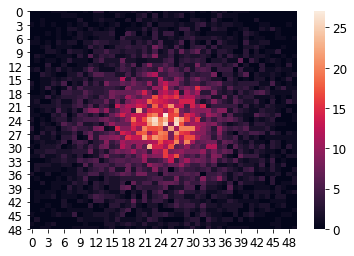

In [8]:
import seaborn as sns
H, xedges, yedges = np.histogram2d(x, y, bins=(50,50))
print(H.shape)
sns.heatmap(H.T)

The last figure shows that the number of houses is larger in ligher areas. In other words, the density of houses is larger in ligher colors.
Next, we will create a T matrix 2500 by 2 which shows different points in 5000 by 5000 area. For example our points are (50,50), (150,50), .... So both x and y change from 50 to 4950 with step=100.

In [9]:
xs = np.arange(50, 5000, 100)
xs.shape
ys=xs

In [10]:
xx, yy = np.meshgrid(xs, ys)
T = np.c_[xx.ravel(), yy.ravel()]
print(T)
T.shape

[[  50   50]
 [ 150   50]
 [ 250   50]
 ...
 [4750 4950]
 [4850 4950]
 [4950 4950]]


(2500, 2)

Next, we calculate the distance of each point to all of the 5 banks (distance2).

In [11]:
Distance2=np.zeros((2500,5))
for i in range(2500):
    point = T[i,:]
    for j in range (5):
        bank = banks[j,:]
        Distance2[i,j] = np.linalg.norm(point-bank)
print(Distance2)
Distance2.shape

[[3131.29366237 5729.31060425 3479.22405142 4257.34659148  790.56941504]
 [3070.0162866  5657.29617397 3380.08875623 4236.153916    710.63352018]
 [3010.81384346 5586.14357137 3281.0059433  4217.22657679  636.39610307]
 ...
 [3683.06937214 1097.72492001 4622.22889957 3824.26463519 6017.05908231]
 [3758.32409459 1151.08644332 4650.26880943 3922.37173149 6084.81717063]
 [3834.70989776 1210.37184369 4680.27776953 4020.57209859 6153.45431445]]


(2500, 5)

Next, we convert distance to cost based on the values given in the question.

In [12]:
Cost1=np.where(Distance2<500, 1, Distance2)
Cost2=np.where((Cost1<1000) & (Cost1>=500), 3, Cost1)
Cost=np.where(Cost2>=1000, 5, Cost2)
print(Cost)

[[5. 5. 5. 5. 3.]
 [5. 5. 5. 5. 3.]
 [5. 5. 5. 5. 3.]
 ...
 [5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5.]]


Then, for each point we calculate the minimum cost among the cost for 5 banks.

In [13]:
MinCost=Cost.min(axis=1)
print(MinCost)
print(MinCost.shape)
MinCost2=MinCost.reshape(50,50)

[3. 3. 3. ... 5. 5. 5.]
(2500,)


Here, we need to flip the "MinCost2" vertically. The reason is that now the first row shows the minimum cost for y=50 and the second row shows the values for y=150 and so on. But we need to prepare "MinCost2" matrix in the format to be able to multiply element-wise by H (result is called "Adver") and then provide the heatmap. So, we want to have the first row of MinCost2 be the values for maximum y meaning 4950 in our case.

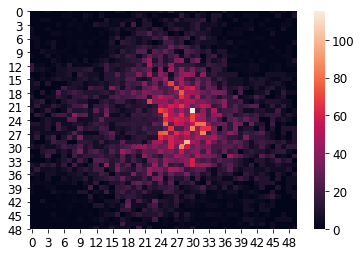

In [14]:
MinCost2=np.flipud(MinCost2)
Adver=np.multiply(H, MinCost2)
sns.heatmap(Adver)

"blu" should focuses more on lighter colors in cream/reddish as they have higher values for "density*cost".

2)	Where is the best location to build a new bank to minimize the transportation costs? Providing a heatmap of a measure of “goodness of location” is a plus.

I think based on the "Adver" matrix that we alreay created, the best location for the bank is where the summation of values within a circle of radius 500 has maximum value. In other words, the bank should be located somewhere which leads to maximum reduction in "density*cost"

Next, we will consider a square filter 10 by 10 and we will scan the "Adver" matrix and we find the summation. The best location is where the summantion is maximum.

In [15]:
summ=0
CostReduction=0
for i in np.arange(5,45):
    for j in np.arange(5,45):
            arr=Adver[i-5:i+5,j-5:j+5]
            summ=np.sum(arr)
            if summ > CostReduction:
                CostReduction = summ
                iny=i
                inx=j
print(inx)
print(iny)

29
26


The best location for the new bank is x=2900, y=2600 based on the granularity 100 we have chosen.